<center> <font size="+1"> TP1b SIC 4102 </font> </center>

# Conditionnemnet, moindres carrés (cas sur-déterminé), sensibilité au bruit, Ridge

In [5]:
# Import de librairies
# %matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../')
import tp2a

$
\newcommand{\bA}{\mathbf{A}}
\newcommand{\bx}{\mathbf{x}}
\newcommand{\by}{\mathbf{y}}
\newcommand{\be}{\mathbf{e}}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\Argmin}{\mathrm{Argmin}}
\newcommand{\st}{\mathrm{s.t.}}
$

On considère le modèle d'observation suivant:
$$
\by = \bA\bx_0 + \be
$$
où $\bA\in\RR^{m\times n}$ est une matrice donnée, $\by$ est le vecteur d'observation (taille $m$), $\bx_0$ est le vecteur des vraies données à reconstituer et $\be$ est un terme de bruit perturbateur.

On suppose $m\geq n$, c'est-à-dire plus d'observations que d'inconnues.

## Génération d'un signal original $\bx_0$
Choisir $n$ de l'ordre de 500.
Générer pour $\bx_0$ des échantillons d'un signal sinusoidal avec une dizaine de périodes.

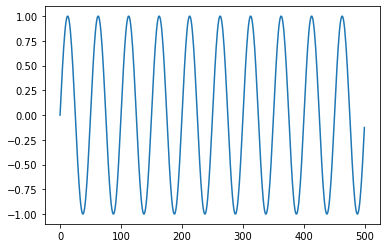

In [6]:
n = 500
x0 = np.sin(2*np.pi*np.arange(n)/n*10)
Fig_x0, Ax_x0 = plt.subplots(1, 1)
Ax_x0.plot(x0)

Générer une matrice $m\times n$ mal conditionnée (on pourra importer et utiliser la fonction `tp2a.educ.bad_cond_matrix` fournie pour ce TP). Générer des observations non bruitées $\by_0=\bA\bx_0$ et des observations bruitées $\by=\bA\bx_0+\be$, avec un rapport signal/bruit de 20dB (c'est un très faible niveau de bruit: faire un éventuel tracé pour s'en convaincre).

## Génération d'observations

Text(0.5, 1.0, 'Observations with noise')

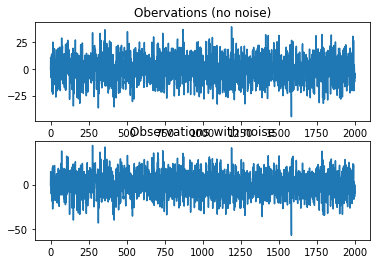

In [7]:
m, n = 2000, 500
condNum = 1e5
A = tp2a.educ.bad_cond_matrix((m,n),condNum)

# ### xtrue et observation non bruitee
x0 = np.sin(2*np.pi*np.arange(n)/n*10)
y0 = A.dot(x0)
# ### ajout de bruit sur les observations
Py = (y0**2).sum()/m
snr_dB = +20
sigma_e = np.sqrt(Py*np.exp(-snr_dB/10))
e = sigma_e*np.random.randn(m)
yn = y0 + e
# ### tracé des observations
Fig_Observ, Ax_Observ = plt.subplots(2, 1)
Ax_Observ[0].plot(y0)
Ax_Observ[0].set_title('Obervations (no noise)')
Ax_Observ[1].plot(yn)
Ax_Observ[1].set_title('Observations with noise')

### Reconstruction et régularisation $\ell_2$ (RIDGE)

On définit
$$
\hat{\bx}_{\ell_2} = \Argmin_\bx  \|\by-\bA\bx\|_2
$$

Regarder ce que donne $\hat{\bx}_{\ell_2}$ dans le cas avec et sans bruit; illustrer que, avec ce faible bruit, c'est une très mauvaise reconstruction de $\bx_0$.

On ré-écrira la fonction `tp2a.educ.approx_l2`.

In [9]:
from numpy.random import randn
from numpy.linalg import svd, inv, solve
from numpy import diag, eye

def inv_sol(A, b):
    return inv(A).dot(b)
    #raise UserWarning('Reprogrammer cette fonction')


def approx_l2(A, b):
    B=np.dot(np.transpose(A),A)
    Ay=np.transpose(A).dot(b)
    return inv(B).dot(Ay)
    #raise UserWarning('Reprogrammer cette fonction')


def least_l2_pen(A, b):
    return A.transpose().dot(inv(A.dot(A.transpose()))).dot(b)
    #raise UserWarning('Reprogrammer cette fonction')


def ridge(A, b, lamb):
    B=np.dot(np.transpose(A),A)+lamb*np.eye(A.shape[0])
    Ay=np.transpose(A).dot(b)
    return inv(B).dot(Ay)
    #raise UserWarning('Reprogrammer cette fonction')

No noise 	 norm(x0 - xl20): 2.45e-06  	 1/n*norm()^2: 1.2e-14
With noise 	 norm(x0 - xl2): 1.06e+03 	 1/n*norm()^2: 2.26e+03


Text(0.5, 1.0, 'xhatn')

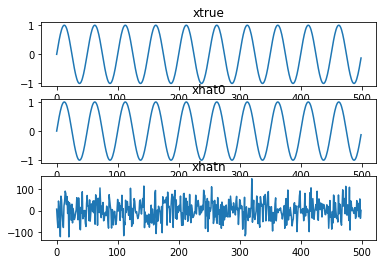

In [10]:
xhat0 = approx_l2(A, y0)
xhatn = approx_l2(A, yn)

print('No noise \t norm(x0 - xl20): {0:2.3g}  \t 1/n*norm()^2: {1:.3g}'\
      .format(np.linalg.norm(x0-xhat0),1/n*np.linalg.norm(x0-xhat0)**2))
print('With noise \t norm(x0 - xl2): {0:2.3g} \t 1/n*norm()^2: {1:.3g}'\
      .format(np.linalg.norm(x0-xhatn),1/n*np.linalg.norm(x0-xhatn)**2))

Fig_xhat, Ax_xhat = plt.subplots(3, 1)
Ax_xhat[0].plot(x0)
Ax_xhat[0].set_title('xtrue')
Ax_xhat[1].plot(xhat0)
Ax_xhat[1].set_title('xhat0')
Ax_xhat[2].plot(xhatn)
Ax_xhat[2].set_title('xhatn')

## Comparaison avec estimateur RIDGE

Calculer les estimées de $\bx_0$ suivantes:
- $\hat{\bx}_n$ que l'on obtient à partir d'observations bruitées $\hat{\bx}_{0} = \bA^{-1}\by$,
- $\hat{\bx}_{ridge}$ (fonction `tp2a.educ.ridge`)

Reprogrammer la fonction `tp2a.educ.ridge(A, b, lamb)` qui renvoie $\hat{\bx}_{\mathrm{ridge}}=\Argmin_\bx \|\by-\bA\bx\|_2^2+\lambda\|\bx\|_2^2$. 

Montrer que $\hat{\bx}_{\mathrm{ridge}}$ peut, selon le choix de $\lambda$, être préférable à $\hat{\bx}_{\ell_2}$. 

In [12]:
def ridge(A, b, lamb):
    return(np.linalg.solve(np.dot(np.transpose(A),A)+lamb*np.eye(A.shape[1]),np.dot(np.transpose(A),b)))

With noise 	 norm(x0 - xl2): 1.06e+03 	 1/n*norm()^2: 2.26e+03
With noise 	 norm(x0 - xridge): 5.8 	 1/n*norm()^2: 0.0673


Text(0.5, 1.0, 'xridge')

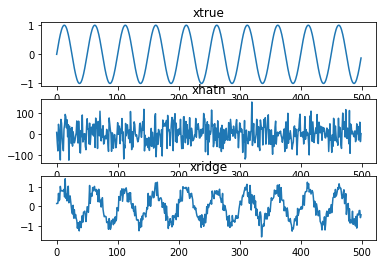

In [13]:
lamb = 40
xridge = ridge(A, yn, lamb)

print('With noise \t norm(x0 - xl2): {0:2.3g} \t 1/n*norm()^2: {1:.3g}'\
      .format(np.linalg.norm(x0-xhatn),1/n*np.linalg.norm(x0-xhatn)**2))
print('With noise \t norm(x0 - xridge): {0:2.3g} \t 1/n*norm()^2: {1:.3g}'\
      .format(np.linalg.norm(x0-xridge),1/n*np.linalg.norm(x0-xridge)**2))

Fig_xhat, Ax_xhat = plt.subplots(3, 1)
Ax_xhat[0].plot(x0)
Ax_xhat[0].set_title('xtrue')
Ax_xhat[1].plot(xhatn)
Ax_xhat[1].set_title('xhatn')
Ax_xhat[2].plot(xridge)
Ax_xhat[2].set_title('xridge')